<a href="https://colab.research.google.com/github/kokchun/Deep-learning-AI21/blob/main/Lectures/Lec3-CNN_intro.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Convolutional Neural Networks (CNN)
---

This is the lecture note for **CNN**. 

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to CNN. I encourage you to read further about CNN. </p>

Read more:
- [Convolutional neural networks - wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)
- [Conv2D layer - keras](https://keras.io/api/layers/convolution_layers/convolution2d/)
- [CNN for visual recognition - CS231](https://cs231n.github.io/convolutional-networks/)
- [CIFAR10 - Krizhevsky et. al.](https://www.cs.toronto.edu/~kriz/cifar.html)

---

X_train.shape=(50000, 32, 32, 3), X_test.shape=(10000, 32, 32, 3)
y_train.shape=(50000,), y_test.shape=(10000,)


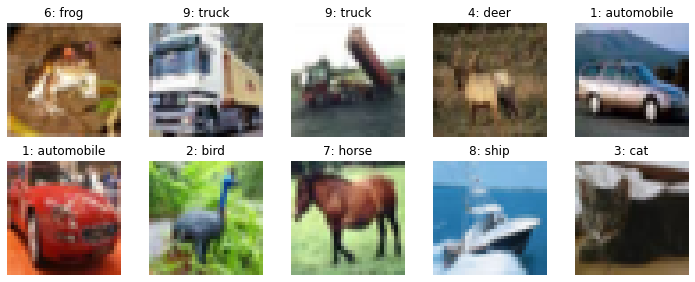

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
import os

(X_train, y_train), (X_test, y_test) = load_data()
y_train, y_test = y_train.ravel(), y_test.ravel()

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}

print(f"{X_train.shape=}, {X_test.shape=}\n{y_train.shape=}, {y_test.shape=}")

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
fig.tight_layout()


In [2]:
print(f"{X_train.min()=}, {X_train.max()=}")
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

---
## CNN model 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


def CNN_model(learning_rate=0.001, drop_rate=0.5, kernels=[32, 64]):

    print(drop_rate)
    # default learning rate in Adam
    adam = Adam(learning_rate=learning_rate)

    model = Sequential(name="CNN_model")

    for number_kernel in kernels:
        conv_layer = Conv2D(
            number_kernel,
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=X_train.shape[1:],
        )

        model.add(conv_layer)
        # defaults to pool_size if None
        model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = CNN_model(.001, .5, [32, 64, 32])

model.summary()


0.5
Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)       

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(
    scaled_X_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_split=1 / 5,
)

Epoch 1/100
1250/1250 [==============================] - 14s 5ms/step - loss: 1.8195 - acc: 0.3165 - val_loss: 1.5411 - val_acc: 0.4566
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5036 - acc: 0.4459 - val_loss: 1.3268 - val_acc: 0.5266
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3798 - acc: 0.4996 - val_loss: 1.2137 - val_acc: 0.5691
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2832 - acc: 0.5363 - val_loss: 1.1248 - val_acc: 0.6060
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2175 - acc: 0.5612 - val_loss: 1.0852 - val_acc: 0.6222
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1608 - acc: 0.5828 - val_loss: 1.0412 - val_acc: 0.6358
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1183 - acc: 0.5967 - val_loss: 0.9963 - val_acc: 0.6513
Epoch 8/100
1250/1250 [==============================]

In [5]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,acc,val_loss,val_acc
0,1.819468,0.316475,1.541091,0.4566
1,1.503567,0.445875,1.326812,0.5266
2,1.379799,0.499600,1.213710,0.5691
3,1.283172,0.536325,1.124841,0.6060
4,1.217543,0.561150,1.085157,0.6222


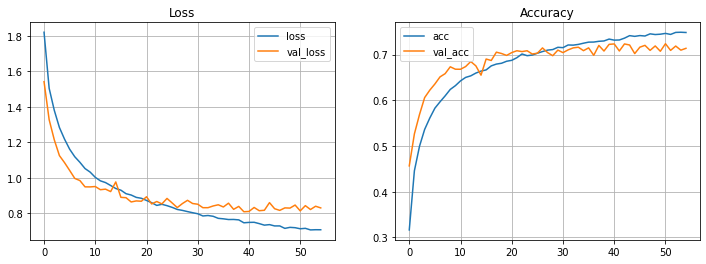

In [6]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)

## Hyperparameter tuning 
We can tune several parameters, e.g.
- dropout rate
- learning rate
- different network configurations

For simplicity we only tune dropout rate here

In [8]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)


def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(
        scaled_X_train,
        y_train,
        validation_split=1 / 6,
        epochs=15,  # small epochs to make training faster
        callbacks=[early_stopper],
    )
    metrics = pd.DataFrame(model.history.history)

    val_acc = metrics["val_acc"].iloc[-1]
    return val_acc


In [9]:
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    # because of floating point precision
    drop_rate = np.round(drop_rate,1) 
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate = drop_rate)


0.1
Epoch 1/15
1303/1303 [==============================] - 6s 4ms/step - loss: 1.3583 - acc: 0.5158 - val_loss: 1.1106 - val_acc: 0.6121
Epoch 2/15
1303/1303 [==============================] - 5s 4ms/step - loss: 1.0015 - acc: 0.6502 - val_loss: 0.9800 - val_acc: 0.6547
Epoch 3/15
1303/1303 [==============================] - 6s 4ms/step - loss: 0.8369 - acc: 0.7067 - val_loss: 0.8828 - val_acc: 0.6975
Epoch 4/15
1303/1303 [==============================] - 6s 4ms/step - loss: 0.7078 - acc: 0.7509 - val_loss: 0.8788 - val_acc: 0.7053
Epoch 5/15
1303/1303 [==============================] - 5s 4ms/step - loss: 0.6011 - acc: 0.7905 - val_loss: 0.8479 - val_acc: 0.7202
Epoch 6/15
1303/1303 [==============================] - 5s 4ms/step - loss: 0.4999 - acc: 0.8249 - val_loss: 0.8697 - val_acc: 0.7191
Epoch 7/15
1303/1303 [==============================] - 5s 4ms/step - loss: 0.4170 - acc: 0.8534 - val_loss: 0.9307 - val_acc: 0.7139
Epoch 8/15
1303/1303 [==============================] - 5s

<AxesSubplot:title={'center':'Tuning dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

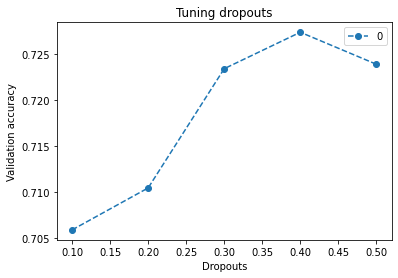

In [26]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)


---
## Train and evaluate on chosen model

In [28]:
# note that we can't use early stopping here as we will train on all training data and no validation
# don't use test data as validation data here 

model_final = CNN_model(drop_rate = .4)

model_final.fit(scaled_X_train, y_train, epochs = 20)



0.4
Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4237 - acc: 0.4919
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0858 - acc: 0.6187
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9482 - acc: 0.6695
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8405 - acc: 0.7065
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7657 - acc: 0.7317
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6929 - acc: 0.7560
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6348 - acc: 0.7778
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5836 - acc: 0.7980
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5393 - acc: 0.8111
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4938 - acc: 0.8262
Epoch 11/20
1563/1563 [==

              precision    recall  f1-score   support

           0       0.71      0.77      0.73      1000
           1       0.94      0.67      0.78      1000
           2       0.71      0.51      0.60      1000
           3       0.56      0.53      0.54      1000
           4       0.72      0.61      0.66      1000
           5       0.60      0.71      0.65      1000
           6       0.75      0.81      0.78      1000
           7       0.72      0.76      0.74      1000
           8       0.84      0.79      0.81      1000
           9       0.65      0.93      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



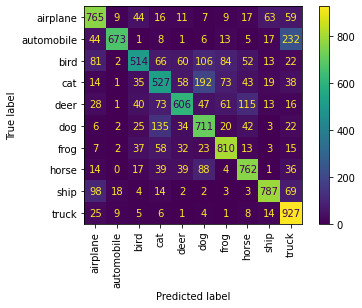

In [40]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model.predict(scaled_X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90);

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
